# Computation on NumPy Arrays: Universal Functions

Numpy provee una interface flexible para optimizar el computo con arrays de datos

Las operaciones de computo con NumPy pueden ser muy rapidas o pueden ser muy lentas. La clave para que sean rapidas es utilizar operaciones VECTORIZADAS, generalmente implementadas a traves de las funciones universales (ufuncs)

Las funciones universales pueden ser utilizadas para realizar calculos repetitivos en elementos del arrays 

## The Slowness od Loops

La implementacion por default (CPython) realiza algunas operaciones muy lentas. Esto se debe en parte a la naturaleza dinamica e interpretado del lenguaje. Las operaciones NO PUEDE SER COMPILADAS al EFICIENTE codigo de maquina como si es realizado en los lenguajes C o Fortran

La relativa lentitud de Python generalmente se manifiesta en situaciones donde muchas pequeñas operaciones son realizadas en forma repetitiva, por ejemplo loops que operan en elementos de un array

Comparando los tiempos de ejecucion de calculos por medios de loop en Python o por medio de las funcionalidades de NumPy se puede comprobar que la diferencia es significativa. Esto no se debe a las operaciones en si, si no a la necesidad de CPython de chequeo que es necesario realizar en cada ciclo del loop

## Introduction UFuncs

Para muchos tipos de operaciones NumPy preovee una interface conveniente de este tipo de rutina de "tipado dinamico", el cual es conocido como operaciones de VECTORIZACION. Esto tiene la ventaja de realizar una operacion sobre el array, el cual es aplicado a cada elemento del mismos.

El uso de la vectorizacion tiene objetivo es utilizar los loops compilados que forman parte de NumPy, con lo cual se logran tiempos de ejecucion mucho mas rapidos.

Las operaciones vectorizadas son implementadas en NumPy via UFUNCS, cuya funcion principales es ejecutar operaciones repetitivas rapidamente en los arrays de NumPy.

Ufuncs son extremadamente flexibles. Por ejemplo se pueden realizar operaciones entre dos arrays

In [1]:
import numpy as np

In [3]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

Las UFuncs NO estan limitadas solo a arrays 1D ya que tambien pueden actuar en arrays multidimensionales

In [4]:
x = np.arange(9).reshape(3,3) #Creo un array de 9 elementos con dimensiones 3x3

In [5]:
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
2**x #Ejecuto una operacion de potencia utilizando el array anterior

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

Los computos realizados utilizando vectorizacion a traves de UFuncs son siempre mas eficientes que su contraparte implementado a traves de los loops de Python, especialmente cuando el tamaño del array crece en tamaño. Cada vez que se vean en Python operaciones a traves de loops es conveniente considerar si estas operaciones no pueden ser reemplazadas por medio de expresiones vectorizadas

## Exploring NumPy´s UFuncs

Las Ufuncs existen en de dos tipos:

1) Ufuncs unitarias que operan con un "input" simple

2) Ufuncs binarias que operan con dos "input"

### Array arithmetic

Ufuncs de NumPy es de uso natural por que las operaciones aritmeticas son similares a las utilizadas en Python

In [9]:
x = np.arange(4) #Creo un array de 4 elementos

In [10]:
x

array([0, 1, 2, 3])

In [13]:
#A continuacion se veran operaciones sobre el array x, las cuales se realizan elemento a elemento del propio array

print("x   =",x) #Imprimo la igualdad
print("x+5 =", x+5) #Imprimo la suma
print("x-5 =", x-5) #Imprimi la resta
print("x*2 =", x*2) #Imprimo la multiplicacion
print("x/2 =", x/2) #Imprimo la division
print("x//2=", x//2) #Imprimo la division entera

x   = [0 1 2 3]
x+5 = [5 6 7 8]
x-5 = [-5 -4 -3 -2]
x*2 = [0 2 4 6]
x/2 = [0.  0.5 1.  1.5]
x//2= [0 0 1 1]


Tambien existen funciones unitarias para la negacion, potencia y modulo:

In [14]:
print("x   =",-x)
print("x**2=",x**2)
print("x% 2=",x%2)

x   = [ 0 -1 -2 -3]
x**2= [0 1 4 9]
x% 2= [0 1 0 1]


Para el caso de operaciones compuestas el orden de las operaciones aritmeticas se respeta (operator precedence)

In [16]:
-(0.5*x + 1)**2 #Realizo una operacion compuesta

array([-1.  , -2.25, -4.  , -6.25])

Todas estas operacioes aritmeticas son simplemente "envoltorios" de funciones construidas en NumPy. Por ejemplo el operador suma(+) se corresponde con la funcion ADD:

In [19]:
np.add(x,2) #Utilizo la "built in function" add

array([2, 3, 4, 5])

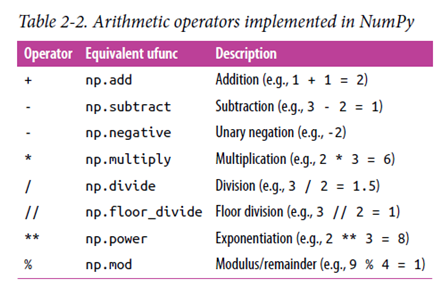

### Absolute Value

In [22]:
x = np.array([-2,-1,0,1,2]) #Creo un array 1D

In [23]:
x

array([-2, -1,  0,  1,  2])

In [25]:
abs(x) #Obtengo el valor absoluto de cada elemento del arrays

array([2, 1, 0, 1, 2])

La corrrspondiente Ufunc para NumPy es np.absolute, la cual tambien se encuentra disponible por medio del alias np.abs

In [26]:
np.absolute(x) #Utilizo la Ufunc de NumPy para obtener el valor absoluto

array([2, 1, 0, 1, 2])

In [28]:
np.abs(x) #Tambien puedo utilizar la forma abreviada

array([2, 1, 0, 1, 2])

La Ufunc puede tambien manejar datos complejos, en cuyo caso el valor absoluto retorna la magnitud

In [29]:
x = np.array([3-4j,4-3j,2+0j,0+1j]) #Creo un array con elementos complejos

In [30]:
x

array([3.-4.j, 4.-3.j, 2.+0.j, 0.+1.j])

In [32]:
np.abs(x) #Obtengo la magnitud de los numeros complejos

array([5., 5., 2., 1.])

### Trigonometric functions

NumPy provee un largo numero de Ufuncs y algunas son muy utiles para ciencia de datos, como ejemplo las funciones trigonometricas

In [36]:
#Comenzaremos definiendo un array de angulos

#Inicio = 0
#Fin = numero pi
#Numero de elementos=3

theta = np.linspace(0,np.pi,3)

In [37]:
theta

array([0.        , 1.57079633, 3.14159265])

Ahora se pueden realizar algunos computos con funciones trigonometricas:

In [40]:
print("theta     =",theta) #Visualizo el valor del array de angulos
print("sin(theta)=",np.sin(theta)) #Calculo el seno de cada elemento del array
print("cos(theta)=",np.cos(theta)) #Calculo el coseno de cada elemento del array
print("tan(theta)=",np.tan(theta)) #Calculo la tangente de cada elemento del array

theta     = [0.         1.57079633 3.14159265]
sin(theta)= [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)= [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)= [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Los valores son computados con precision de maquina, lo cual significa que valores que deben ser cero no siempre son exactamente cero

Las funciones trigonometricas inversas tambien estan disponibles:

In [45]:
x = [-1,0,1] #Creo una lista de 3 elementos
print("x        =",x) #Visualizo el valor del array de angulos
print("arcsin(x)=",np.arcsin(x)) #Calculo el arcoseno de cada elemento del array
print("arccos(x)=",np.arccos(x)) #Calculo el arcocoseno de cada elemento del array
print("arctan(x)=",np.arctan(x)) #Calculo el arcotangente de cada elemento del array

x        = [-1, 0, 1]
arcsin(x)= [-1.57079633  0.          1.57079633]
arccos(x)= [3.14159265 1.57079633 0.        ]
arctan(x)= [-0.78539816  0.          0.78539816]


### Exponents and logarithms

Otro tipo comun de operaciones disponibles en NumPy Ufuncs son los exponentes:

In [47]:
x = [1,2,3] #Creo un lista de 3 elementos

In [49]:
print("x   =",x) #Visualizo la lista creada de 3 elementos
print("e^x =",np.exp(x)) #Calculo el exponente base e
print("2^x =",np.exp2(x)) #Calculo el exponente base 2
print("3^x =",np.power(3,x)) #Calculo el exponente base 3

x   = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


Los inversos a los exponentes, los logaritmos tambien se encuentran disponibles.

np.log se utiliza para el logaritmo natural
Tambien se encuentan disponibles los logaritmos base 2 y logaritmos base 10

In [52]:
x = [1,2,4,10] #Creo una lista de 4 elementos

In [54]:
print("x         =",x) #Visualizo la lista creada de 4 elementos
print("ln(x)     =",np.log(x)) #Visualizo el logaritmo natural
print("log2(x)   =",np.log2(x)) #Visualizo el logaritmo base 2
print("log10(x)  =",np.log10(x)) #Visualizo el logaritmo base 10

x         = [1, 2, 4, 10]
ln(x)     = [0.         0.69314718 1.38629436 2.30258509]
log2(x)   = [0.         1.         2.         3.32192809]
log10(x)  = [0.         0.30103    0.60205999 1.        ]


Existen algunas versiones especializadas que son utiles para mantener la precision con pequeños inputs:

In [58]:
x = [0,0.001,0.01,0.1] #Creo una lista de 4 elementos

In [57]:
x

[0, 0.001, 0.01, 0.1]

In [59]:
print("exp(x)-1 =",np.expm1(x))
print("log(1+x) =",np.log1p(x))

exp(x)-1 = [0.         0.0010005  0.01005017 0.10517092]
log(1+x) = [0.         0.0009995  0.00995033 0.09531018]


Cuando x es muy pequeño estas funciones dan valores mas precisos que el calculo por medio de np.log o np.exp

### Specialized Ufuncs

NumPy tiene muchas otras Ufuncs disponibles, incluidas entre otras: Funciones trigonometricas hiperbolicas, aritmica de bits, operadores de comparacion, conversiones de radianes a grados, redondeos y remanentes y muchos otros. Una vista a traves de la documentacion de NumPy revela muchas otras funcionalidades interesantes

Otra excelente fuente es scipy.special. Algunos ejemplos se muestran a continuacion:

In [2]:
from scipy import special

In [3]:
#Funcion gamma(factoriales generalizados) y funciones relacionadas

x = [1,5,10]
print("gamma(x)    =",special.gamma(x))
print("ln|gamma(x)|=",special.gammaln(x))
print("beta(x,2)   =",special.beta(x,2))

gamma(x)    = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)|= [ 0.          3.17805383 12.80182748]
beta(x,2)   = [0.5        0.03333333 0.00909091]


In [4]:
#Funcion error (integral de la guassiana): Su complemente y su inversa

x = np.array([0,0.3,0.7,1.0])
print("erf(x)   =",special.erf(x))
print("erdc(x)  =",special.erfc(x))
print("erfinv(x)=",special.erfinv(x))

erf(x)   = [0.         0.32862676 0.67780119 0.84270079]
erdc(x)  = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x)= [0.         0.27246271 0.73286908        inf]


Existen muchisimas Ufuncs disponibles en NumPy y scipy.special

## Caracteristicas avanzadas Ufuncs

### Especificando salidas

Para calculos largos algunas veces es util especificar el array donde los resultados de los calculos seran almacenados. En lugar de crear un array temporario, uno puede utilizar esto para escribir los resultados del computo directamente en ubicacion de memoria donde uno quiere que este. Para todas las Ufuncs, uno puede realizar esto utilizando el argumento "out" de la funcion:

In [6]:
x = np.arange(5) #Creo un array de 5 elementos para utilizar en el calculo
y = np.empty(5) #Creo un array empty de 5 elementos que luego utilizara para almacenar los resultados del calculo
np.multiply(x,10,out=y) #Realizo la operacion de multiplicacion y almaceno el resultado en el array y
print(y) #Imprimo el resultado

[ 0. 10. 20. 30. 40.]


Esto incluse se puede utilizar con vistas del array. Por ejemplo podemos escribir los resultados de un computo en cualquier otro elemento:

In [21]:
y = np.zeros(10) #Creo un array de ceros con 10 elementos
np.power(2,x,out=y[::2]) #Realizo la operacion de potenciacion 2**x y lo almaceno en los elementos del array 2 con step=2
print(y) #Imprimo el resultado

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Si nosotros hubiesemos escrito y[::2] = 2**x esto hubiese resultado en la creacion de un array temporario que aloje los resultados de 2**x, seguido por una segunda operacion copiando estos valores en el array y. Esto no tiene mucho diferencia para computos pequeños, pero para muy largos arrays el ahorro de memoria debido a un uso cuidadoso del argunmento out puede ser significante 

### Agregados

Para Ufuncs binarias existen algunos "agregados" interesantes que puede ser computados directamente del objeto

Por ejemplo, llamando a la funcion "reduce" en la Ufunc "add" se obtiene la suma de todos los elementos del array:

In [28]:
x = np.arange(1,6) #Creo un array de 5 elementos
np.add.reduce(x) #Sumo los elementos del array y retorno el valor

15

En forma similar llamando "reduce" en la Ufunc "multiply" se obtiene el producto de todos los elementos del array

In [29]:
np.multiply.reduce(x) #Multiplico los elementos del array y retorno el valor

120

Si queremos almacenar todos los resultados intermedios del computo podemos utilizar "accumulate":

In [30]:
np.add.accumulate(x) #Veo los calculos intermedios de la suma de los elementos del array

array([ 1,  3,  6, 10, 15], dtype=int32)

In [33]:
np.multiply.accumulate(x) #Veo los calculos intermedios del producto de los elementos del array

array([  1,   2,   6,  24, 120], dtype=int32)

Notar que para estos casos particulares existen funciones de NumPy dedicados para computar los resultados:

np.sum

np.prod

np.cumsum

np.cumprod

### Producto de Matrices 

Finalmente cualquier Ufunc puede computar la salida de todos los pares de diferentes imputs utilizando el metodo "outer":

In [37]:
x = np.arange(1,6) #Creo una array 1D de 5 elementos
x #Visualizo el array

array([1, 2, 3, 4, 5])

In [38]:
np.multiply.outer(x,x) #Realizo el producto utilizando como vector fila y vector columna el array 1D creado anteriormente

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

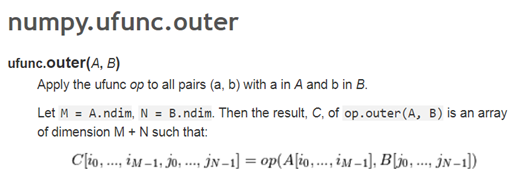